# Introduzione

Studenti:
* Gravante Sara 886191
* Tosato Alessio 886081

Link del dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Modelli: SVM e Decision tree

## Importazione librerie

In questo blocco iniziale importiamo tutte le librerie necessarie per l’analisi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

import kagglehub
import os

## Caricamento dataset

Il dataset viene importato dalla piattaforma kaggle e, tramite la funzione `pd.read_csv`, viene caricato in un DataFrame Pandas per farne analisi e manipolazione dei dati.

In [2]:
path_to_dataset = kagglehub.dataset_download('uciml/breast-cancer-wisconsin-data')
dataset = os.path.join(path_to_dataset, 'data.csv')

df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

# Analisi Esplorativa dei dati

Con il comando `df.head()`, vengono visualizzate le prime cinque righe del DataFrame e con il comando `df.tail()` le ultime cinque.

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


### Bilanciamento variabile target

Viene mostrata una visualizzazione della  distribuzione della variabile target "`diagnosis`" (diagnosi) rispetto ai dati del dataset:
* "B" si riferisce alla diagnosi di tumore benigno
* "M" si riferisce alla diagnosi di tumore maligno.

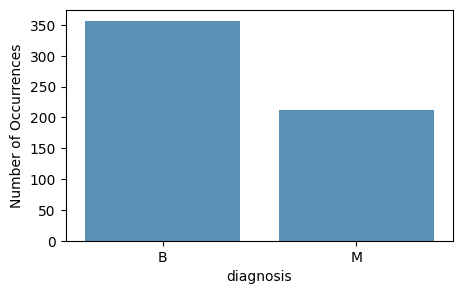

In [5]:
cnt_pro = df['diagnosis'].value_counts()
plt.figure(figsize=(5,3))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('diagnosis', fontsize=10)
plt.show();

In [6]:
df['diagnosis'].value_counts(normalize=True)

,proportion
diagnosis,
B,0.627417
M,0.372583


Dato che la variabile target è un po' sbilanciata, andranno bilanciate le classi durante la classificazione, aggiungendo il parametro `class_weight='balanced'`.

## Valori nulli o mancanti

Gli algoritmi di Machine Learning, generalmente, non possono lavorare con valori mancanti, quindi prima di avviare un algoritmo di machine learning dobbiamo pulire il dataset; rimuoveremo le caratteristiche (features) che non influenzano il modello.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

`df.describe()` rende note le principali caratteristiche del range di valori di ciascuna feature.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


 Viene dunque resa nota l'eventuale presenza di valori mancanti (NaN) all'interno del DataFrame `df`.

In [9]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


## Matrice di Correlazione

La matrice di correlazione è uno strumento fondamentale nell'analisi esplorativa dei dati, poiché consente di identificare relazioni lineari tra variabili. Ogni elemento della matrice rappresenta il coefficiente di correlazione tra due variabili, indicando la forza e la direzione della loro relazione.

Al fine di garantire l'integrità del calcolo delle correlazioni e migliorare la leggibilità della heatmap, si crea una variabile `numerical` contenente esclusivamente variabili numeriche che siano utili al fine del calcolo. Vengono dunque escluse: `id`, `diagnosis` e `Unnamed: 32`.

In [10]:
# numerical = list(df.dtypes[df.dtypes != "object"].index)

numerical = df.columns[2:32]
numerical

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

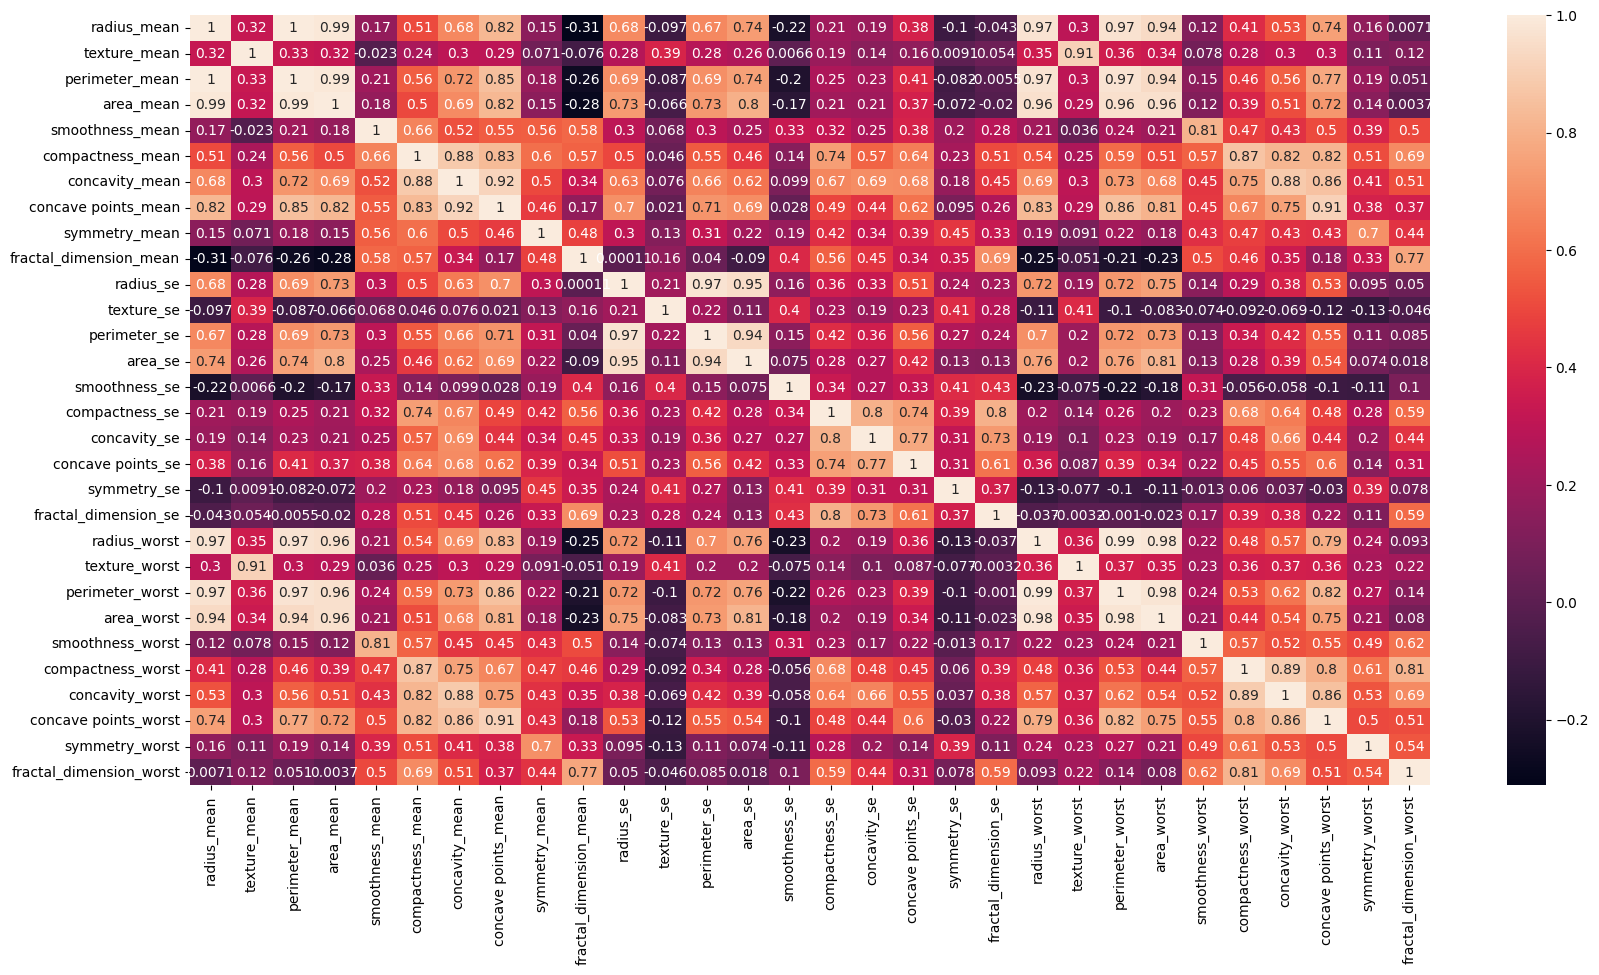

In [11]:
plt.figure(figsize=(20,10))
corr = df[numerical].corr()
sns.heatmap(corr, annot=True)
plt.ioff()

La palette di colori a lato rappresenta il grado di correlazione tra le variabili: la tonalità più chiara indica un'alta correlazione.

## Distribuzione delle caratteristiche

Questo blocco di codice genera istogrammi con curve di densità per ciascuna variabile numerica nel dataset, eccetto `id`, `diagnosis` e `Unnamed: 32`.

Per ciascuna colonna viene creato un sottografico usando `sns.histplot()`, con la distribuzione della variabile sull'asse X.

Viene mostrata anche la curva di densità, impostando `kde=True`.

Questa visualizzazione aiuta a comprendere la distribuzione delle variabili e a individuare eventuali asimmetrie o anomalie nei dati.

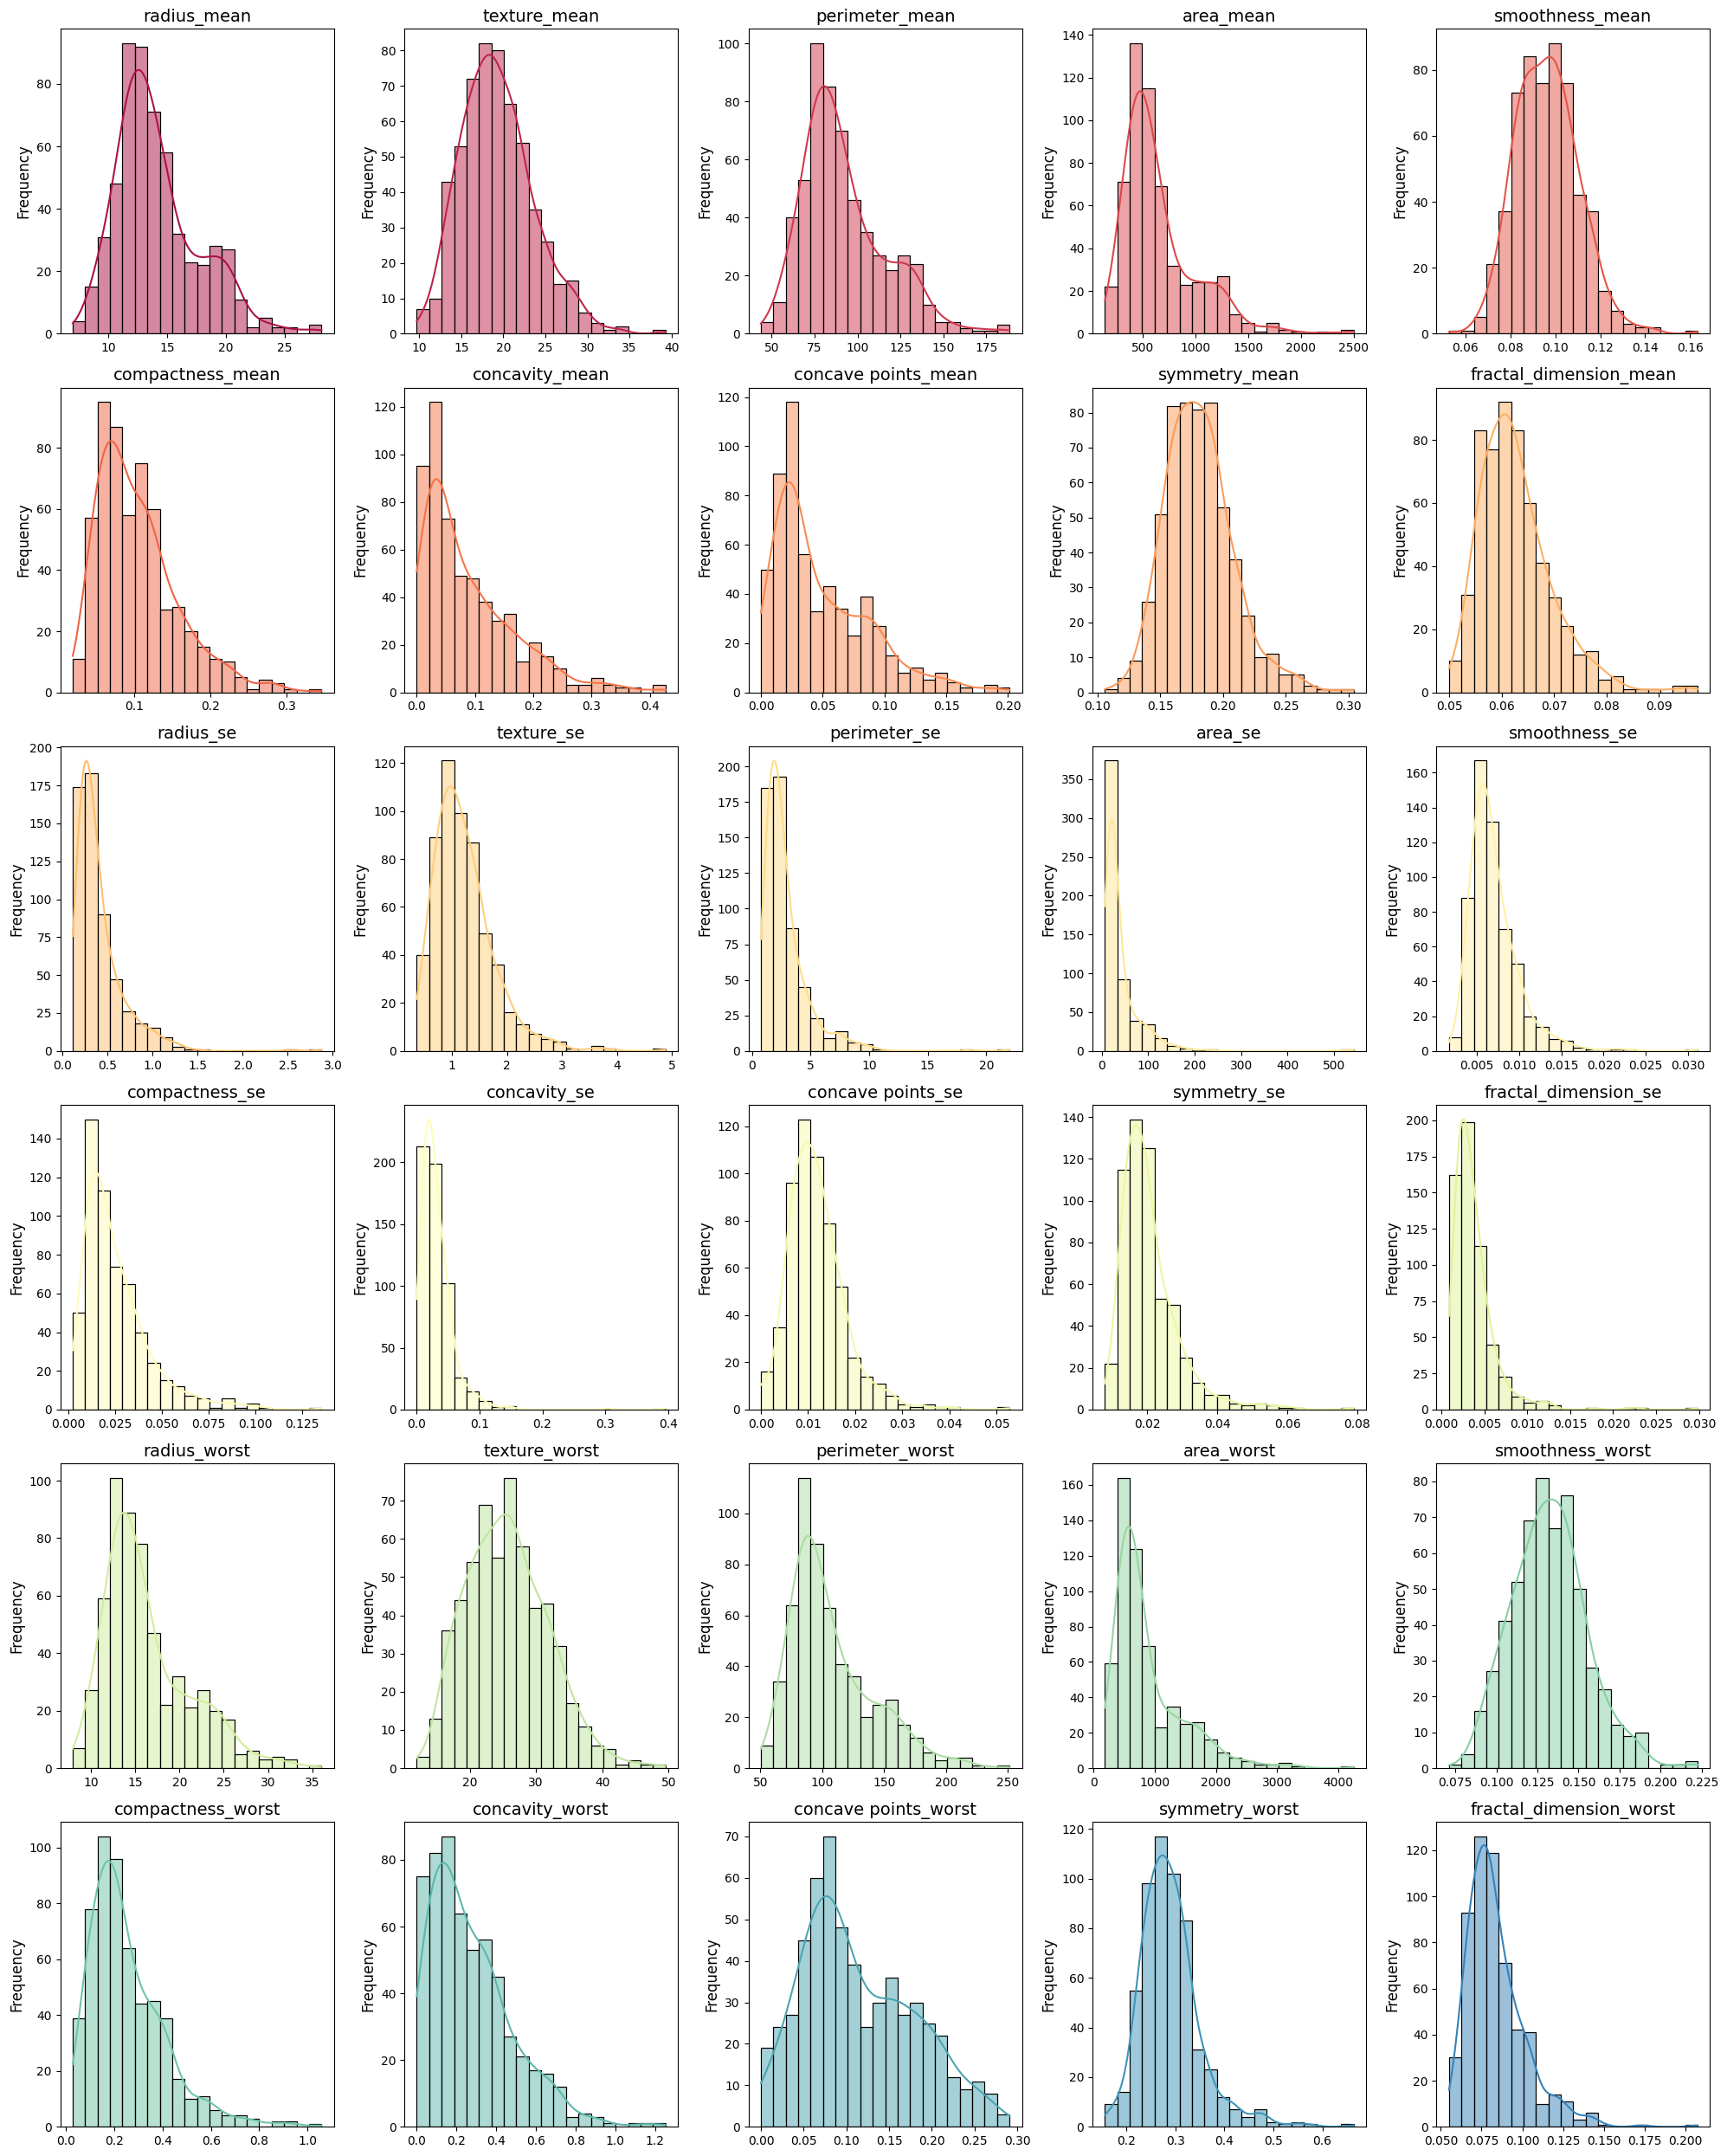

In [12]:
plt.figure(figsize=(20, 25))
sns.set_palette('Spectral')
colors = sns.color_palette('Spectral', n_colors=len(df.columns) - 1)

for i, column in enumerate(df.loc[:, numerical], 1):
    plt.subplot(6, 5, i)
    sns.histplot(data=df, x=column, kde=True, bins=20, color=colors[i-1])
    plt.title(column, fontsize=14)
    plt.xlabel('', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

## Boxplot delle caratteristiche
Questo blocco di codice genera boxplot per ciascuna variabile numerica nel dataset, eccetto `id`, `diagnosis` e `Unnamed: 32`.

Per ciascuna colonna, viene generato un boxplot verticale con `sns.boxplot()`.

I boxplot aiutano a individuare **outlier**, distribuzioni asimmetriche e la variabilità delle caratteristiche del dataset.

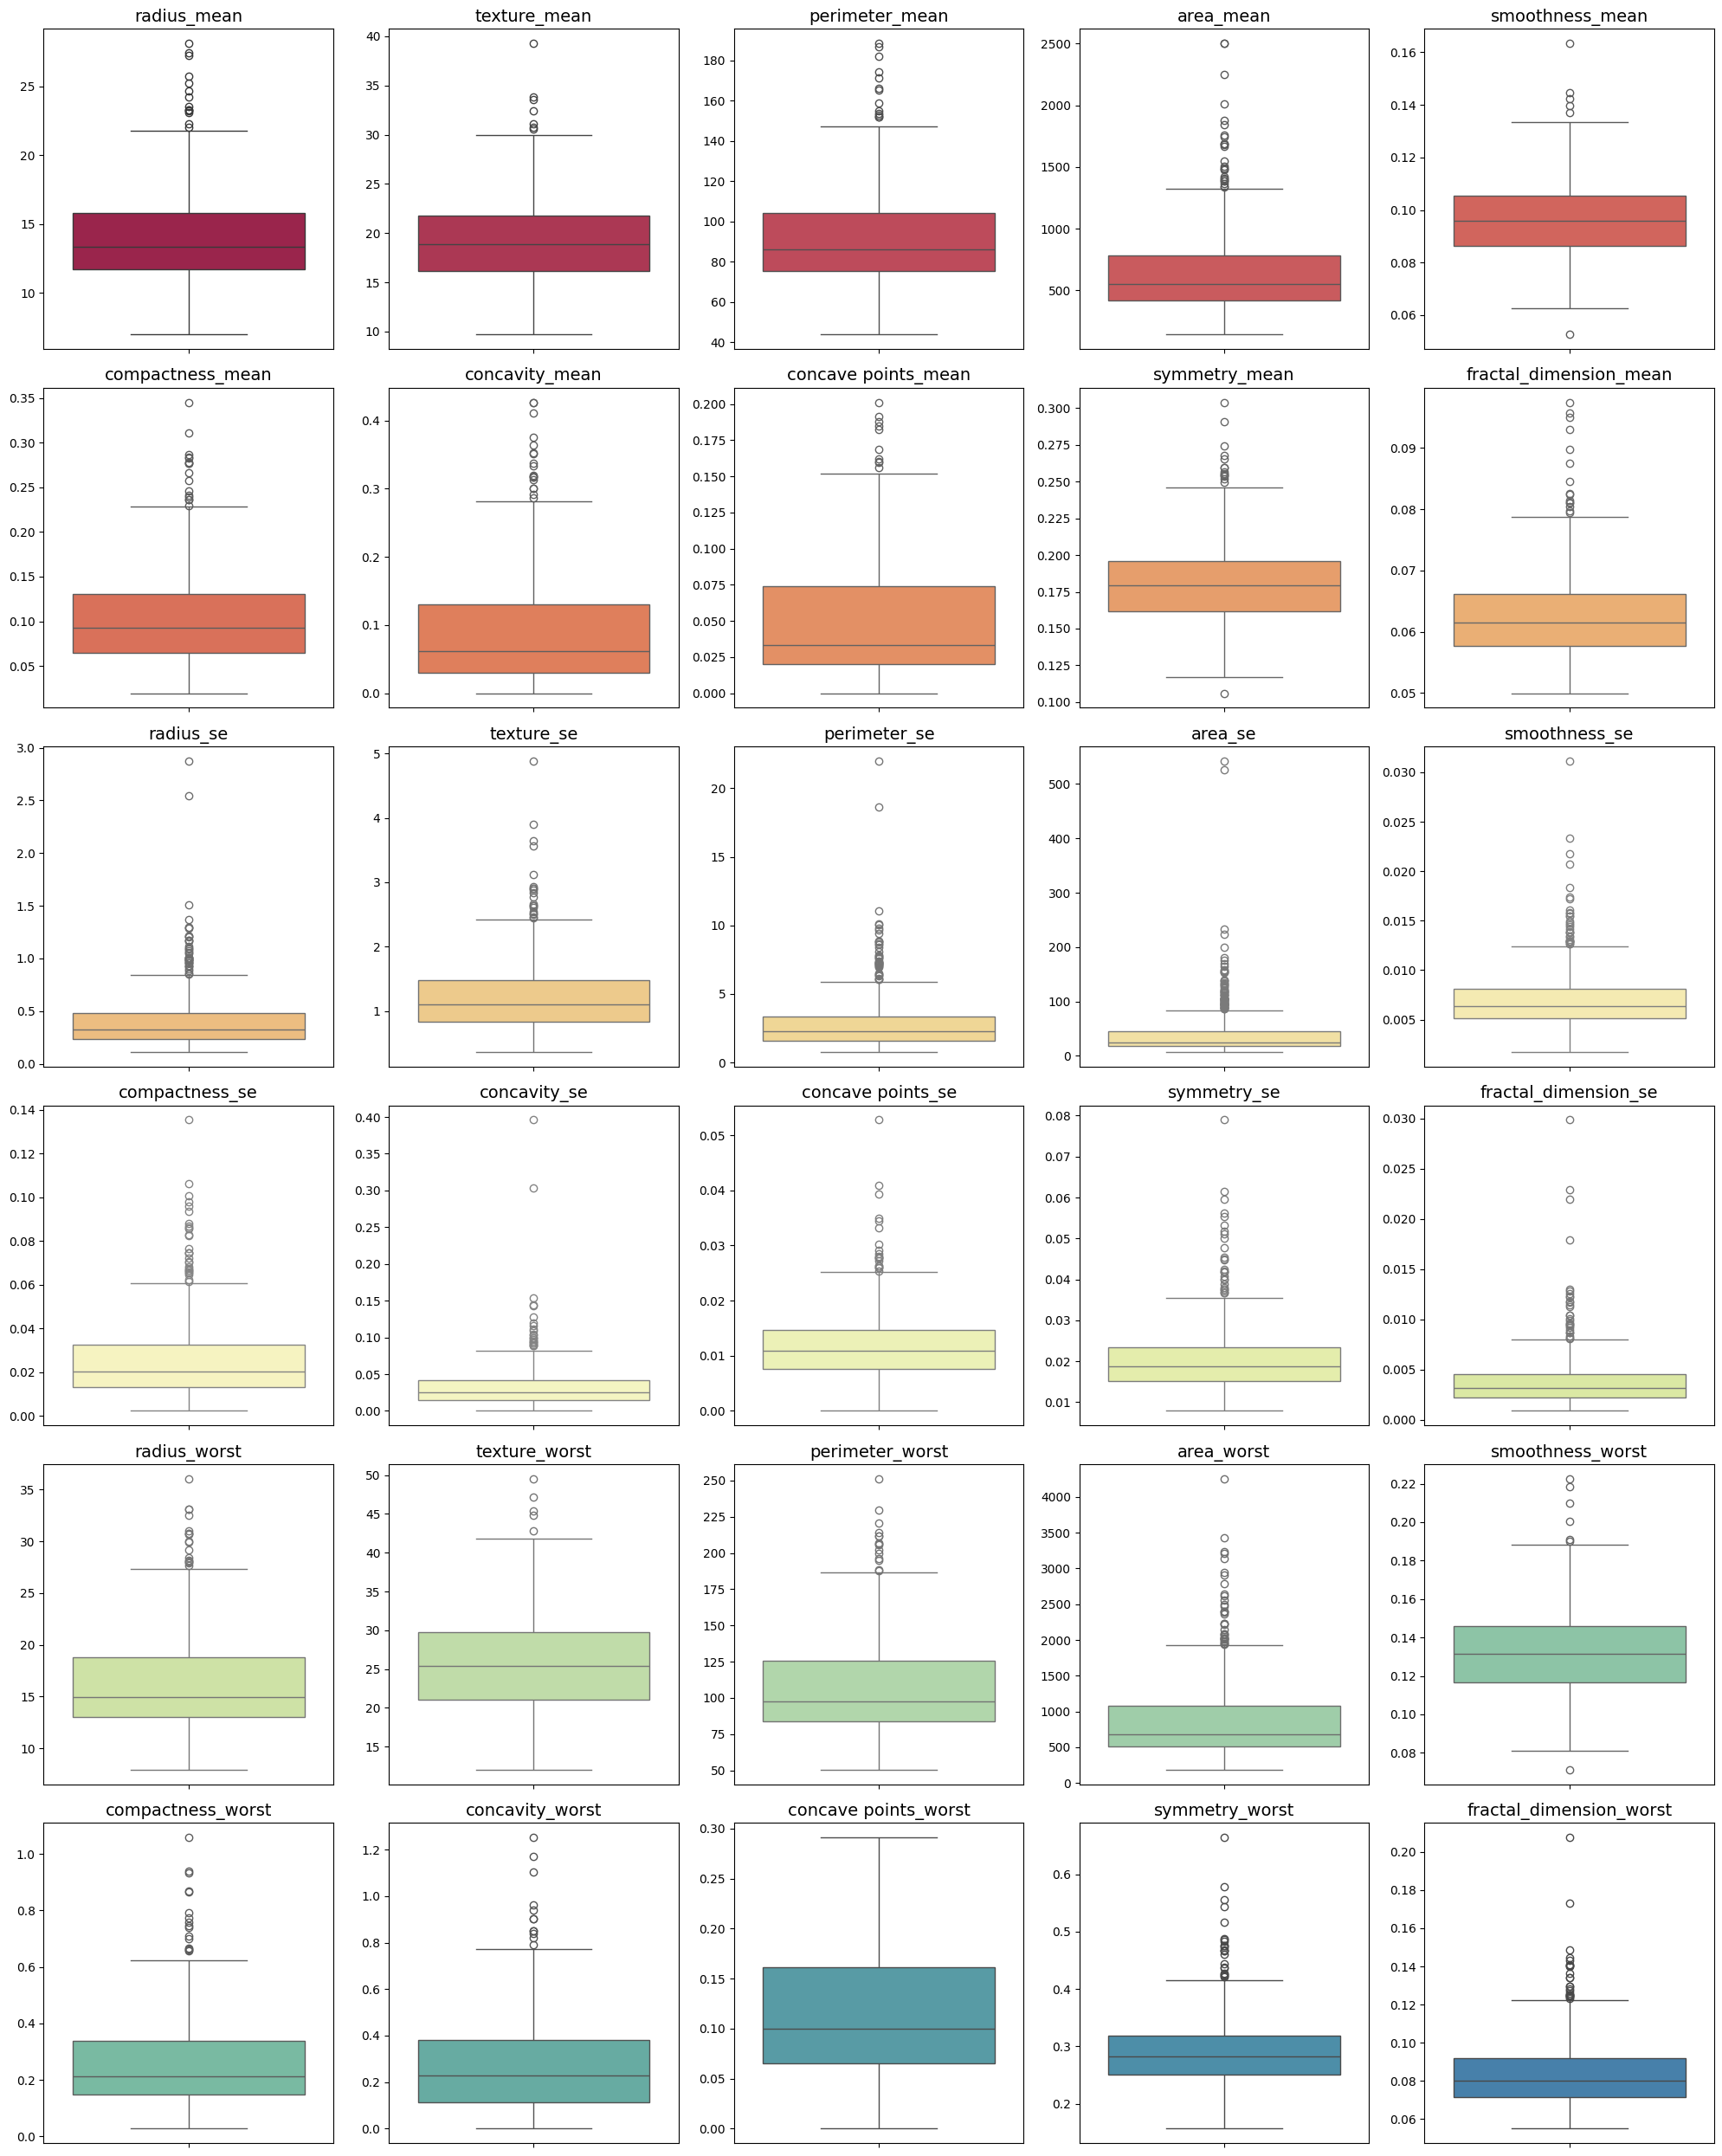

In [13]:
plt.figure(figsize=(20, 25))
sns.set_palette('Spectral')

for i, column in enumerate(df.loc[:, numerical], 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=df[column], color=colors[i-1])
    plt.title(column, fontsize=14)
    plt.xlabel('', fontsize=8)
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Preprocessing


## Eliminazione valori nulli


In [14]:
df = df.drop(['Unnamed: 32'], axis=1)

Nuova visualizzazione di `.head()` e `.info()` dopo l'eliminazione della 32esima colonna ("`Unnamed`"):


In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Suddivisione dati

In questa fase vengono preparati i dati per l'utilizzo dei modelli.

### Codifica dati categorici

Gli algoritmi di machine learning possono leggere solo valori numerici, quindi è essenziale codificare le caratteristiche categoriche in valori numerici: attraverso `LabelEncoder()`, "maligno" viene codificato come 1 e "benigno" come 0.

In [17]:
LEncoder = LabelEncoder()
df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

In [18]:
print(df['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


### Suddivisione train/set

Viene selezionato un insieme di dati di addestramento da fornire all’algoritmo di Machine Learning, in modo da garantire che l’addestramento dell’algoritmo di classificazione possa essere generalizzato efficacemente a nuovi dati.



In [19]:
y = df['diagnosis']
X = df.drop(columns=['id', 'diagnosis'])

Con la funzione `train_test_split` dal modulo `sklearn.model_selection` si divide il dataset negli insiemi di **training** e **test**: il 20% dei dati viene usato per il test, mentre il restante 80% è usato per l'addestramento.

In [20]:
#random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

## Standardizzazione

Scalare le feature è una fase del preprocessing dei dati applicata alle variabili indipendenti e serve a normalizzare i dati entro un certo intervallo.

La **standardizzazione** consiste nel sottrarre il valore medio (quindi i valori standardizzati avranno sempre media pari a zero) e successivamente dividere per la deviazione standard. Questo metodo *non ha un intervallo specifico da 0 a 1*, il che può rappresentare un problema per molti algoritmi, come le reti neurali, che spesso si aspettano valori di input compresi tra 0 e 1.

`Scikit-learn` fornisce un trasformatore chiamato `StandardScaler`. L’idea alla base di `StandardScaler` è quella di trasformare i dati in modo che la loro distribuzione abbia una media pari a 0 e una deviazione standard pari a 1.

In [22]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Modelli

I modelli di machine learning scelti per la classificazione sono:
* SVM
* Decision Tree

---

Viene eseguita una **grid search** (`GridSearchCV`) per ciascun modello, al fine di trovare la combinazione di parametri ottimale.

* Il valore di `.best_score_` restituito da `GridSearchCV` rappresenta la **media dei punteggi di cross-validation** (in questo caso, a 5 fold) ottenuti dal modello con la combinazione di iperparametri ottimale, secondo la metrica "accuracy".

* `class_weight='balanced'` bilancia i pesi associati alle classi: fondamentale in casi di dataset sbilanciati.

## SVM -- Support Vector Machine

Parametri **SVC**:

*   `C`: Parametro di regolarizzazione.
*   `kernel`: Tipo di kernel.
*   `gamma`: Coefficiente del kernel.
*   `n_jobs=-1`: Indica al processo di utilizzare tutti i core disponibili per velocizzare.

In [23]:
svc = SVC(probability=True, class_weight='balanced')


param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 1, 0.1, 0.01],
}

grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

best_svc = grid_search_svc.best_estimator_
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_
print('Parametri migliori:', best_params_svc, '\nMedia punteggi CV=5:', best_score_svc)


y_train_pred_svc = grid_search_svc.predict(X_train)
y_test_pred_svc = grid_search_svc.predict(X_test)

train_acc_svc_gs = round(accuracy_score(y_train, y_train_pred_svc), 4)
test_acc_svc_gs = round(accuracy_score(y_test, y_test_pred_svc), 4)

print('\nSVC Train Accuracy:', train_acc_svc_gs, '\nSVC Test Accuracy:', test_acc_svc_gs)

Parametri migliori: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'} 
Media punteggi CV=5: 0.9802197802197803

SVC Train Accuracy: 0.9846 
SVC Test Accuracy: 0.9649


## DT -- Decision Tree

Parametri **DT**:

* `criterion`: Criterio di divisione.
* `max_depth`: Profondità massima dell'albero.
* `min_samples_split`: Numero minimo di campioni richiesto per dividere un nodo interno.
* `min_samples_leaf`: Numero minimo di campioni richiesto in un nodo foglia.
* `max_features`: Numero di caratteristiche da considerare per la migliore divisione.

In [24]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)


param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    # 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
    # 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
    # 'min_samples_split': [2, 4, 5, 6, 7, 8, 9, 10],
    # 'max_features': [None, 'sqrt', 'log2', 10, 15, 20]

    # 'max_depth': [2, 3, 4, 5, 6],               # limitare la profondità per evitare overfitting
    # 'min_samples_leaf': [2, 3, 4, 5, 6],        # evitare foglie con 1 solo elemento
    # 'min_samples_split': [5, 10, 15],           # evitare split su pochi dati
    # 'max_features': ['sqrt', 'log2']            # limitare le feature testate per split

    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2', 10, 20]
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print('Parametri migliori:', best_params_dt, '\nMedia punteggi CV=5:', best_score_dt)


y_train_pred_dt = grid_search_dt.predict(X_train)
y_test_pred_dt = grid_search_dt.predict(X_test)

train_acc_dt_gs = round(accuracy_score(y_train, y_train_pred_dt), 4)
test_acc_dt_gs = round(accuracy_score(y_test, y_test_pred_dt), 4)

print('\nDT Train Accuracy:', train_acc_dt_gs, '\nDT Test Accuracy:', test_acc_dt_gs)

Parametri migliori: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 2} 
Media punteggi CV=5: 0.9516483516483516

DT Train Accuracy: 0.967 
DT Test Accuracy: 0.9737


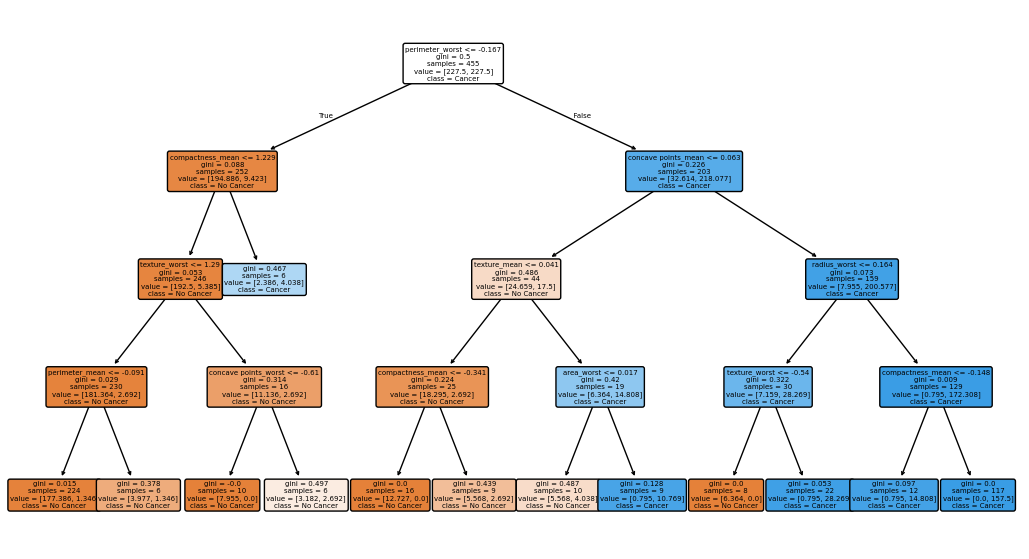

In [25]:
plt.figure(figsize=(13, 7))#, facecolor='silver')
plot_tree(best_dt, filled=True, max_depth=4, feature_names=X.columns, class_names=['No Cancer', 'Cancer'], fontsize=5, rounded=True)
plt.show()

# Valutazione modelli

Valutare un modello di machine learning è una parte fondamentale in qualsiasi progetto di data science. Esistono numerose *metriche* che ci aiutano a valutare le prestazioni del modello..

* Accuratezza della classificazione

* Matrice di confusione

* Precisione

* Recall

* Report di classificazione

* Punteggio ROC AUC

* Area sotto la curva (AUC)

Ora, vediamo un confronto delle prestazioni di ciascun classificatore.

## Classification Report


In [26]:
print('Classification Report SVC Model:')
print(classification_report(y_test, y_test_pred_svc))

print('Classification Report Decision Tree Model:')
print(classification_report(y_test, y_test_pred_dt))

Classification Report SVC Model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Classification Report Decision Tree Model:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Il seguente codice mostra un confronto grafico tra le prestazioni dei modelli, basato sulle metriche di **precision**, **recall** e **F1-score**, offrendo così una visione complessiva dell’efficacia di ciascun classificatore.

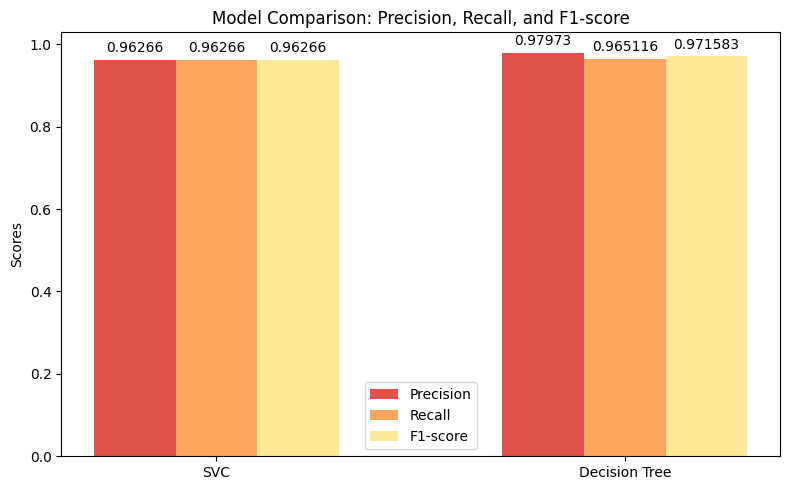

In [27]:
models = ['SVC', 'Decision Tree']
cr_svc = classification_report(y_test, y_test_pred_svc, output_dict=True)
cr_dt = classification_report(y_test, y_test_pred_dt, output_dict=True)

# Macro-avg per SVC e per Decision Tree:
precision_svc = cr_svc['macro avg']['precision']
recall_svc = cr_svc['macro avg']['recall']
f1_score_svc = cr_svc['macro avg']['f1-score']

precision_dt = cr_dt['macro avg']['precision']
recall_dt = cr_dt['macro avg']['recall']
f1_score_dt = cr_dt['macro avg']['f1-score']

precision = [precision_svc, precision_dt]
recall = [recall_svc, recall_dt]
f1_score = [f1_score_svc, f1_score_dt]

metrics = ['Precision', 'Recall', 'F1-score']
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()

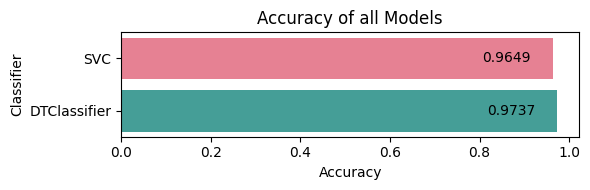

In [28]:
plt.figure(figsize=(6,2))
a = { 'Accuracy' : [test_acc_svc_gs, test_acc_dt_gs] , 'Classifier' : ['SVC' , 'DTClassifier'] }
data_frame = pd.DataFrame(a)
ax = sns.barplot(data=data_frame, x='Accuracy', y='Classifier', hue='Classifier', palette='husl', legend=False)
ax.set_title('Accuracy of all Models')

# Aggiunta delle etichette all'interno delle barre
for p in ax.patches:
    width = p.get_width()
    ax.text(width - 0.05, p.get_y() + p.get_height() / 2, f'{width:.4f}', va='center', ha='right', color='black')

plt.tight_layout()
plt.show()

Come possiamo vedere, tra i classificatori SVM e Decision Tree, il **classificatore DT** è quello che classifica meglio questo dataset.

## Matrice di confusione

Una **matrice di confusione** è una tabella che può essere utilizzata per misurare le prestazioni di un algoritmo di machine learning, solitamente di apprendimento supervisionato.

Ogni riga della matrice rappresenta le istanze della classe reale, mentre ogni colonna rappresenta le istanze della classe predetta.

Nel caso di un **classificatore binario**, la classe "vera" è solitamente etichettata con 1, mentre la classe "falsa" è etichettata con 0.

* **Vero Positivo** (TP – True Positive): un'osservazione della classe positiva (1) è correttamente classificata come positiva dal modello.

* **Falso Positivo** (FP – False Positive): un'osservazione della classe negativa (0) è erroneamente classificata come positiva.

* **Vero Negativo** (TN – True Negative): un'osservazione della classe negativa è correttamente classificata come negativa.

* **Falso Negativo** (FN – False Negative): un'osservazione della classe positiva è erroneamente classificata come negativa.

Visualizziamo ora la matrice di confusione per osservare quanto sono accurati i risultati ottenuti.

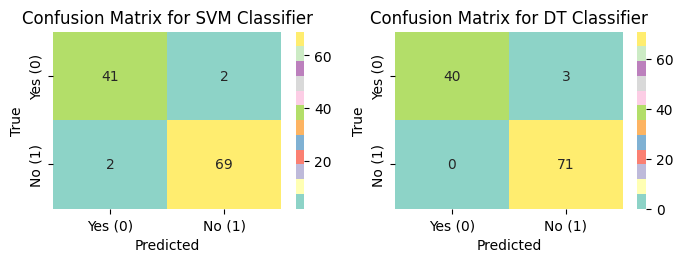

In [29]:
plt.figure(figsize=(7, 7))

plt.subplot(3, 2, 1)
cm_svc = confusion_matrix(y_test, y_test_pred_svc, labels=[1,0])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['No', 'Yes'], cmap='Blues')
sns.heatmap(cm_svc, annot=True, fmt='g',cmap='Set3', annot_kws={'size': 10})
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0.5, 1.5], ['Yes (0)', 'No (1)'])
plt.yticks([0.5, 1.5], ['Yes (0)', 'No (1)'])

plt.subplot(3, 2, 2)
cm_dt = confusion_matrix(y_test, y_test_pred_dt, labels=[1,0])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No', 'Yes'], cmap='Blues')
sns.heatmap(cm_dt, annot=True, fmt='g',cmap='Set3', annot_kws={'size': 10})
plt.title('Confusion Matrix for DT Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0.5, 1.5], ['Yes (0)', 'No (1)'])
plt.yticks([0.5, 1.5], ['Yes (0)', 'No (1)'])

plt.tight_layout()
plt.show()

Come possiamo vedere dalla figura sopra:

* **Vero Positivo** (TP): valori che il modello ha predetto come **Yes** (*Healthy*) e che sono effettivamente **Yes** (*Healthy*).

* **Vero Negativo** (TN): valori che il modello ha predetto come **No** (*Cancer*) e che sono effettivamente **No** (*Cancer*).

* **Falso Positivo** (FP): valori che il modello ha predetto come **Yes** (*Healthy*) ma che in realtà sono **No** (*Cancer*).

* **Falso Negativo** (FN): valori che il modello ha predetto come **No** (*Cancer*) ma che in realtà sono **Yes** (*Healthy*).

In questo dataset, ogni volta che il modello predice **Yes**, indica l’assenza di cellule tumorali (*Healthy*), mentre quando predice **No**, indica la presenza di cellule tumorali (*Cancer*).

## ROC Curve

La **curva ROC** mostra il compromesso tra sensibilità (TPR) e specificità (1 – FPR).

**Tasso di veri positivi / Recall / Sensibilità**

Con quale frequenza il modello predice "Yes" (Healthy) quando in realtà è "Yes" (Healthy)?

**True Positive Rate** (**TPR**) $= \frac{TP}{TP + FP} = \frac{71}{71 + 2} = 0,97$

\\

**False Positive Rate**

Con quale frequenza il modello predice "Yes" (Healthy) quando in realtà è "No" (Cancer)?

**False Positive Rate** (**FPR**) $= \frac{FP}{FP + TN} = \frac{2}{2 + 4} = 0,04$

AUC SVC= 0.9627 
AUC DTClassifier= 0.9651


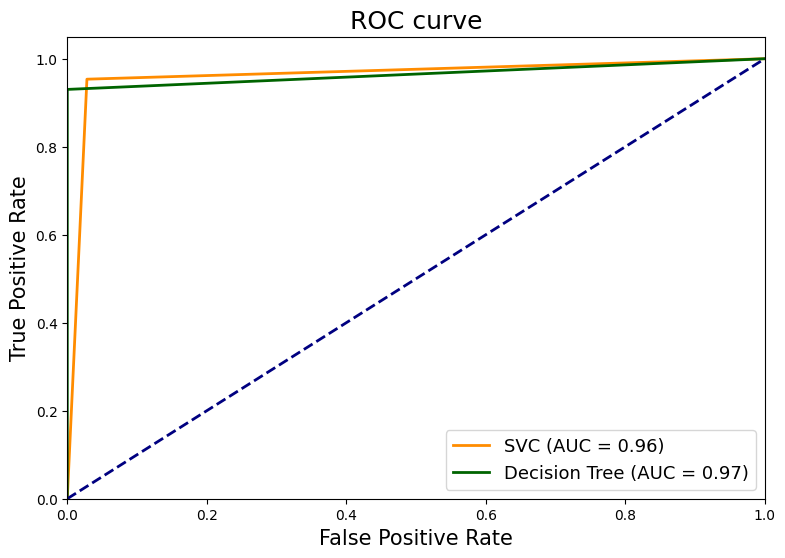

In [30]:
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_test_pred_svc)
roc_auc_svc = round((auc(fpr_svc, tpr_svc)),4)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_dt)
roc_auc_dt = round((auc(fpr_dt, tpr_dt)),4)

print ('AUC SVC=', roc_auc_svc, '\nAUC DTClassifier=', roc_auc_dt)

plt.figure(figsize =[9,6])
# plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot(fpr_svc, tpr_svc, color='darkorange', label=f'SVC (AUC = {roc_auc_svc:.2f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, color='darkgreen', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', linewidth=2)
plt.plot([0,1], [0,1], color='navy', linewidth=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('ROC curve', fontsize= 18)
plt.legend(loc='lower right', fontsize = 13)
plt.show()

Il classificatore DT (AUC=0.9651) ha l'AUC (area sotto la curva ROC) maggiore dell'SVC, anche se di poco (AUC=0.9627), quindi ha prestazioni migliori.